<a href="https://colab.research.google.com/github/vncecruz/Emptech-2/blob/main/Cruz_Hands_on_Activity_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submission Details

Name: Vince Joseph B. Cruz<br>
Course and Section: CPE 019-CPE32S1 - Emerging Technologies 2 in CpE <br>
Date of Submission: June 30, 2024 <br>
Instructor: Engr. Roman Richard<br>

---

# Explain your datasets and the problem being addressed

The Heart Disease dataset consists of 303 instances with attributes such as age, sex, chest pain type, resting blood pressure, and cholesterol levels. The goal is to build predictive models that can accurately diagnose the presence of heart disease based on these features. This dataset is crucial for developing effective tools and algorithms for early detection and management of cardiovascular conditions, aiming to improve patient outcomes and healthcare delivery.

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
import numpy as np
import pandas as pd

heart = pd.read_csv('/content/drive/MyDrive/Emptech/heart-2.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Classification

In [20]:
from sklearn import model_selection

heart_train, heart_test = model_selection.train_test_split(heart, test_size=0.2, random_state=1)
print("Shape of the original heart data:", heart.shape)
print("Shape of the training data:", heart_train.shape)
print("Shape of the test data:", heart_test.shape)

heart_train = heart_train.reset_index(drop=True)
heart_test = heart_test.reset_index(drop=True)

Shape of the original heart data: (1025, 14)
Shape of the training data: (820, 14)
Shape of the test data: (205, 14)


In [21]:
heart.groupby('target').size()

target
0    499
1    526
dtype: int64

In [24]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [23]:
heart_features = heart.drop('target', axis=1)
heart_features.shape

(1025, 13)

In [25]:
from sklearn.feature_selection import VarianceThreshold

heart_var = VarianceThreshold()

heart_var.fit_transform(heart_features)

for feature in zip(heart_features.columns, heart_var.variances_):
    print(feature)

('age', 48.0)
('sex', 0.21173682331945276)
('cp', 1.059125758477097)
('trestbps', 106.0)
('chol', 438.0)
('fbs', 0.1269872694824509)
('restecg', 0.27838286734086853)
('thalach', 131.0)
('exang', 0.22329565734681736)
('oldpeak', 1.3794030791195717)
('slope', 0.38124925639500307)
('ca', 1.0615071980963713)
('thal', 0.3848433075550267)


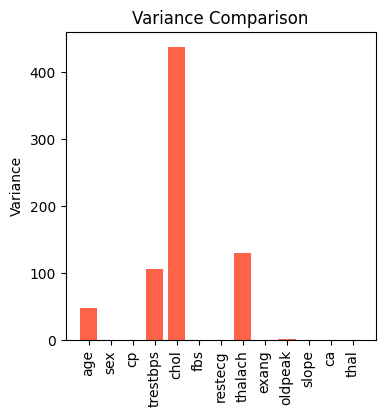

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=heart_features.columns, height=heart_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [27]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)

heart_features_new = selector.fit_transform(heart_features)

print('Number of features before variance thresholding: {}'.format(heart_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(heart_features_new.shape[1]))

Number of features before variance thresholding: 13
Number of features after variance thresholding: 12


In [28]:
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
heart_labels = ['target']

print('HEART DATASET')
print("Features - " + str(heart_features))
print("Labels - " + str(heart_labels))

heart_train_features = heart_train[heart_features]
heart_train_label = heart_train[heart_labels]
print('Train data split into features and labels')

heart_test_features = heart_test[heart_features]
heart_test_label = heart_test[heart_labels]
print('Test data split into features and labels')

HEART DATASET
Features - ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Labels - ['target']
Train data split into features and labels
Test data split into features and labels


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(heart_train_features, heart_train_label)

DecisionTreeClassifier(max_depth=3)

In [30]:
predictions_dt = dt.predict(heart_test_features)

heart_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt), 1))
heart_pred_label.rename(columns={0: 'dt_prediction'}, inplace=True)
heart_pred_label.head(5)

,dt_prediction
0,0
1,1
2,1
3,1
4,0


In [31]:
heart_test_pred = pd.concat([heart_test_label, heart_pred_label], axis=1)
heart_test_pred.head()

,target,dt_prediction
0,0,0
1,1,1
2,1,1
3,0,1
4,0,0


In [32]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(heart_test_label, heart_pred_label)*100.0, "%")

accuracy is 83.41463414634146 %


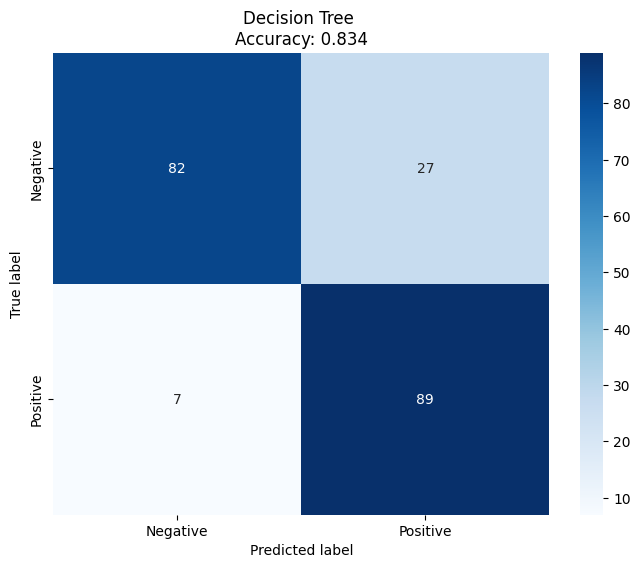

In [40]:
import seaborn as sns
cm = metrics.confusion_matrix(heart_test_label, heart_pred_label)

labels = ['Negative', 'Positive']

cm_df = pd.DataFrame(cm,
                     index=labels,
                     columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree \nAccuracy: {:.3f}'.format(metrics.accuracy_score(heart_test_label, heart_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


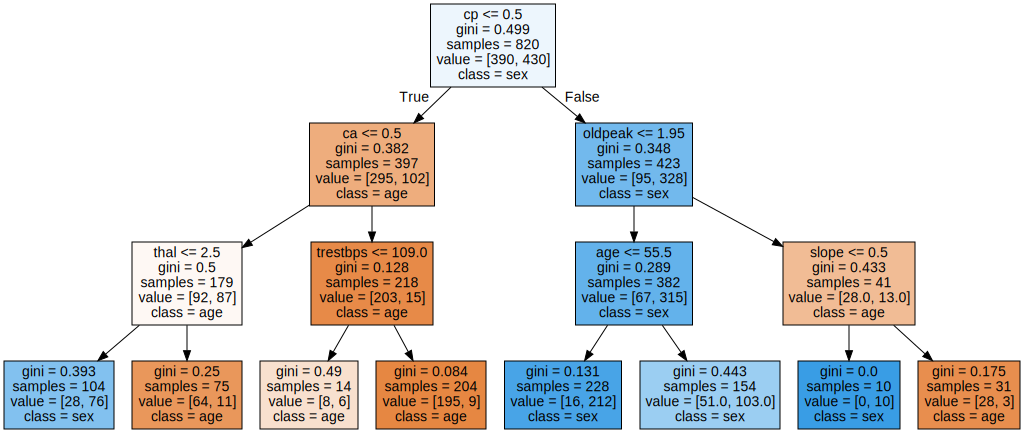

In [42]:
from sklearn import tree
import graphviz
import pandas as pd

dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=heart_features,
                                class_names=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [45]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

heart_features = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
heart_labels = np.array([0, 1, 0, 1, 0])

dt = DecisionTreeClassifier()

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=1)  #

cv_scores = cross_val_score(dt, heart_features, heart_labels, cv=cv)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.3f}')

Cross-validation scores: [0. 0. 0. 0. 0.]
Mean accuracy: 0.000


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

heart_features = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
heart_labels = np.array([0, 1, 0])

model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(heart_features, heart_labels, epochs=10, batch_size=1, verbose=1)

loss, accuracy = model.evaluate(heart_features, heart_labels)
print(f'Accuracy after adding hidden layers: {accuracy:.3f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4583 - loss: 1.5933  
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4583 - loss: 1.2965      
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.6374  
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8333 - loss: 0.5215
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7083 - loss: 0.5692 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8333 - loss: 0.4547 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4583 - loss: 0.8479      
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4583 - loss: 0.7904      
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.6607 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 0.6012 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.6667 - loss: 0.6351
Accuracy after adding hidden layers: 0.667


# Regression

The dataset consists of information about various chemical properties of red "Vinho Verde" wine variants, with a focus on predicting their quality. This is approached as both a classification and regression problem due to the ordered and imbalanced nature of wine quality classes. The goal is to develop a predictive model that accurately categorizes or estimates the quality of wine based on these chemical attributes, despite the challenges posed by the dataset's size and imbalance.

In [46]:
wine = pd.read_csv('/content/drive/MyDrive/Emptech/WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [47]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [48]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [49]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [50]:
wine.groupby('quality').size()

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [51]:
from sklearn import model_selection

wine_train, wine_test = model_selection.train_test_split(wine, test_size=0.2, random_state=1)
print("Shape of the original wine data: ", wine.shape)
print("Shape of the wine train data = ", wine_train.shape)
print("Shape of the wine test data = ", wine_test.shape)

wine_train = wine_train.reset_index(drop=True)
wine_test = wine_test.reset_index(drop=True)

Shape of the original wine data:  (1143, 13)
Shape of the wine train data =  (914, 13)
Shape of the wine test data =  (229, 13)


<Axes: >

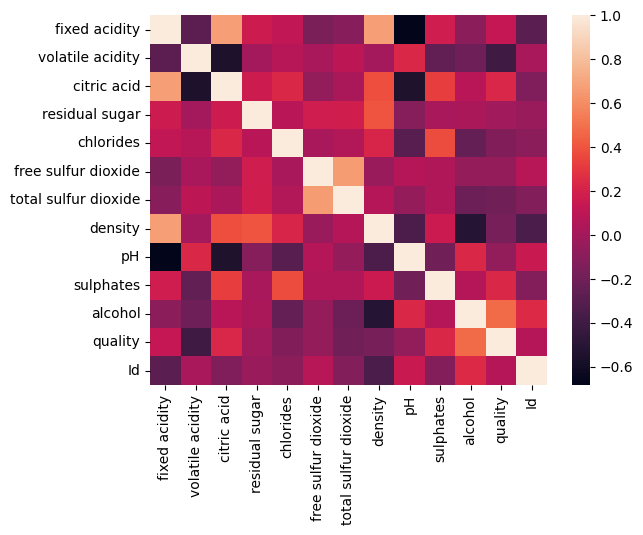

In [52]:
import seaborn as sns

wine_corr_matrix = wine_train.corr()
sns.heatmap(data=wine_corr_matrix, annot=False)

In [53]:
wine_corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.474697
sulphates               0.235419
citric acid             0.227608
fixed acidity           0.126014
Id                      0.066378
residual sugar         -0.006925
free sulfur dioxide    -0.056569
pH                     -0.062879
chlorides              -0.132708
density                -0.176655
total sulfur dioxide   -0.190788
volatile acidity       -0.401976
Name: quality, dtype: float64

In [54]:
wine_features = ['fixed acidity', 'volatile acidity', 'citric acid',
                 'residual sugar', 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide', 'density', 'pH', 'sulphates',
                 'alcohol']
wine_labels = ['quality']

print('WINE DATASET')
print("Features - " + str(wine_features))
print("Labels - " + str(wine_labels))

wine_train_features = wine_train[wine_features]
wine_train_labels = wine_train[wine_labels]
print('✔ Train data split into features and labels')

wine_test_features = wine_test[wine_features]
wine_test_labels = wine_test[wine_labels]
print('✔ Test data split into features and labels')

WINE DATASET
Features - ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Labels - ['quality']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(wine_train_features, wine_train_labels)

LinearRegression()

In [56]:
predictions_lr = lr.predict(wine_test_features)

lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,6.018210
1,5.309831
2,6.252232
3,6.179838
4,5.373503


In [57]:
wine_test_prediction = pd.concat([wine_test_labels, lr_df], axis=1)
wine_test_prediction.head(10)

,quality,lr_prediction
0,5,6.018210
1,5,5.309831
2,6,6.252232
3,6,6.179838
4,6,5.373503
5,8,6.591130
6,5,5.434897
7,6,5.393716
8,6,5.542356
9,5,5.049504


In [58]:
print(lr.intercept_)
print(lr.coef_)

[4.31294645]
[[ 0.01008543 -1.10993855 -0.17203087 -0.00390475 -1.62832938  0.00386213
  -0.00288052  0.33659807 -0.57469346  0.78252797  0.30210836]]


In [59]:
from sklearn import metrics

print(metrics.mean_absolute_error(wine_test_prediction['quality'], wine_test_prediction['lr_prediction']))

print(metrics.mean_squared_error(wine_test_prediction['quality'], wine_test_prediction['lr_prediction']))

print(np.sqrt(metrics.mean_squared_error(wine_test_prediction['quality'], wine_test_prediction['lr_prediction'])))

0.47224886624189016
0.36842307286227954
0.6069786428386748


In [60]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(max_iter=1000, random_state=1))
])

param_grid = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

print(f"Best MSE: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")

Best MSE: -0.05192058155022563
Best parameters: {'regressor__activation': 'tanh', 'regressor__alpha': 0.01, 'regressor__hidden_layer_sizes': (100, 50)}
Test MSE: 0.039163679299238315
Test MAE: 0.13763991745780432
Test RMSE: 0.19789815385505322


# Conclusion

In this activity, I explored Classification and Regression techniques. The Heart Disease dataset predicts heart disease using attributes like age and physiological measurements. A decision tree model achieved 83.41% accuracy confirmed by cross-validation indicating reliable diagnostic performance. The Wine Quality dataset which aimed to predict quality through decision tree regression.